<a href="https://colab.research.google.com/github/ankitaattavar/Supervsied-ML-algorithms/blob/main/Copy_of_Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#encoding
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
y=df['Purchased']
x=df[['Gender','Age','EstimatedSalary']]
x.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [5]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 
x_train

,Gender,Age,EstimatedSalary
250,1,44,39000
63,0,32,120000
312,1,38,50000
159,1,32,135000
283,1,52,21000
...,...,...,...
323,1,48,30000
192,0,29,43000
117,0,36,52000
47,1,27,54000


**Feature Scaling**

**Fitting Random Forest to the Training set**

In [10]:
from sklearn.ensemble import RandomForestClassifier #classifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt',random_state=42) #no of features =3, so log(3)/log(2)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt', random_state=42)

**Predicting the Test set results**

In [11]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

**Making the Confusion Matrix**

In [12]:
acc = accuracy_score(y_test, y_pred)
acc

0.94

In [13]:
acc1 = roc_auc_score(y_test, y_pred)
print("Test set auc1: {:.2f}".format(acc1))

Test set auc1: 0.94


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



**Visualising the Training set results**

In [15]:
acc = roc_auc_score(y_train, rf.predict(x_train))
print("Train set AUC : ", acc)

Train set AUC :  0.9091949091949092


**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


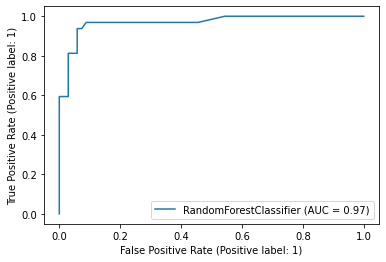

In [16]:
plot_roc_curve(rf, x_test, y_test)

In [17]:
#Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_test, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: Age                  Importance: 0.57
Variable: EstimatedSalary      Importance: 0.42
Variable: Gender               Importance: 0.01


In [33]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

[Text(0.5, 0.8333333333333334, 'EstimatedSalary <= 86500.0\ngini = 0.444\nsamples = 192\nvalue = [200, 100]\nclass = 0'),
 Text(0.25, 0.5, 'Age <= 46.5\ngini = 0.33\nsamples = 148\nvalue = [190, 50]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'gini = 0.122\nsamples = 123\nvalue = [187, 13]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'gini = 0.139\nsamples = 25\nvalue = [3, 37]\nclass = 1'),
 Text(0.75, 0.5, 'Gender <= 0.5\ngini = 0.278\nsamples = 44\nvalue = [10, 50]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'gini = 0.287\nsamples = 18\nvalue = [4, 19]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.272\nsamples = 26\nvalue = [6, 31]\nclass = 1')]

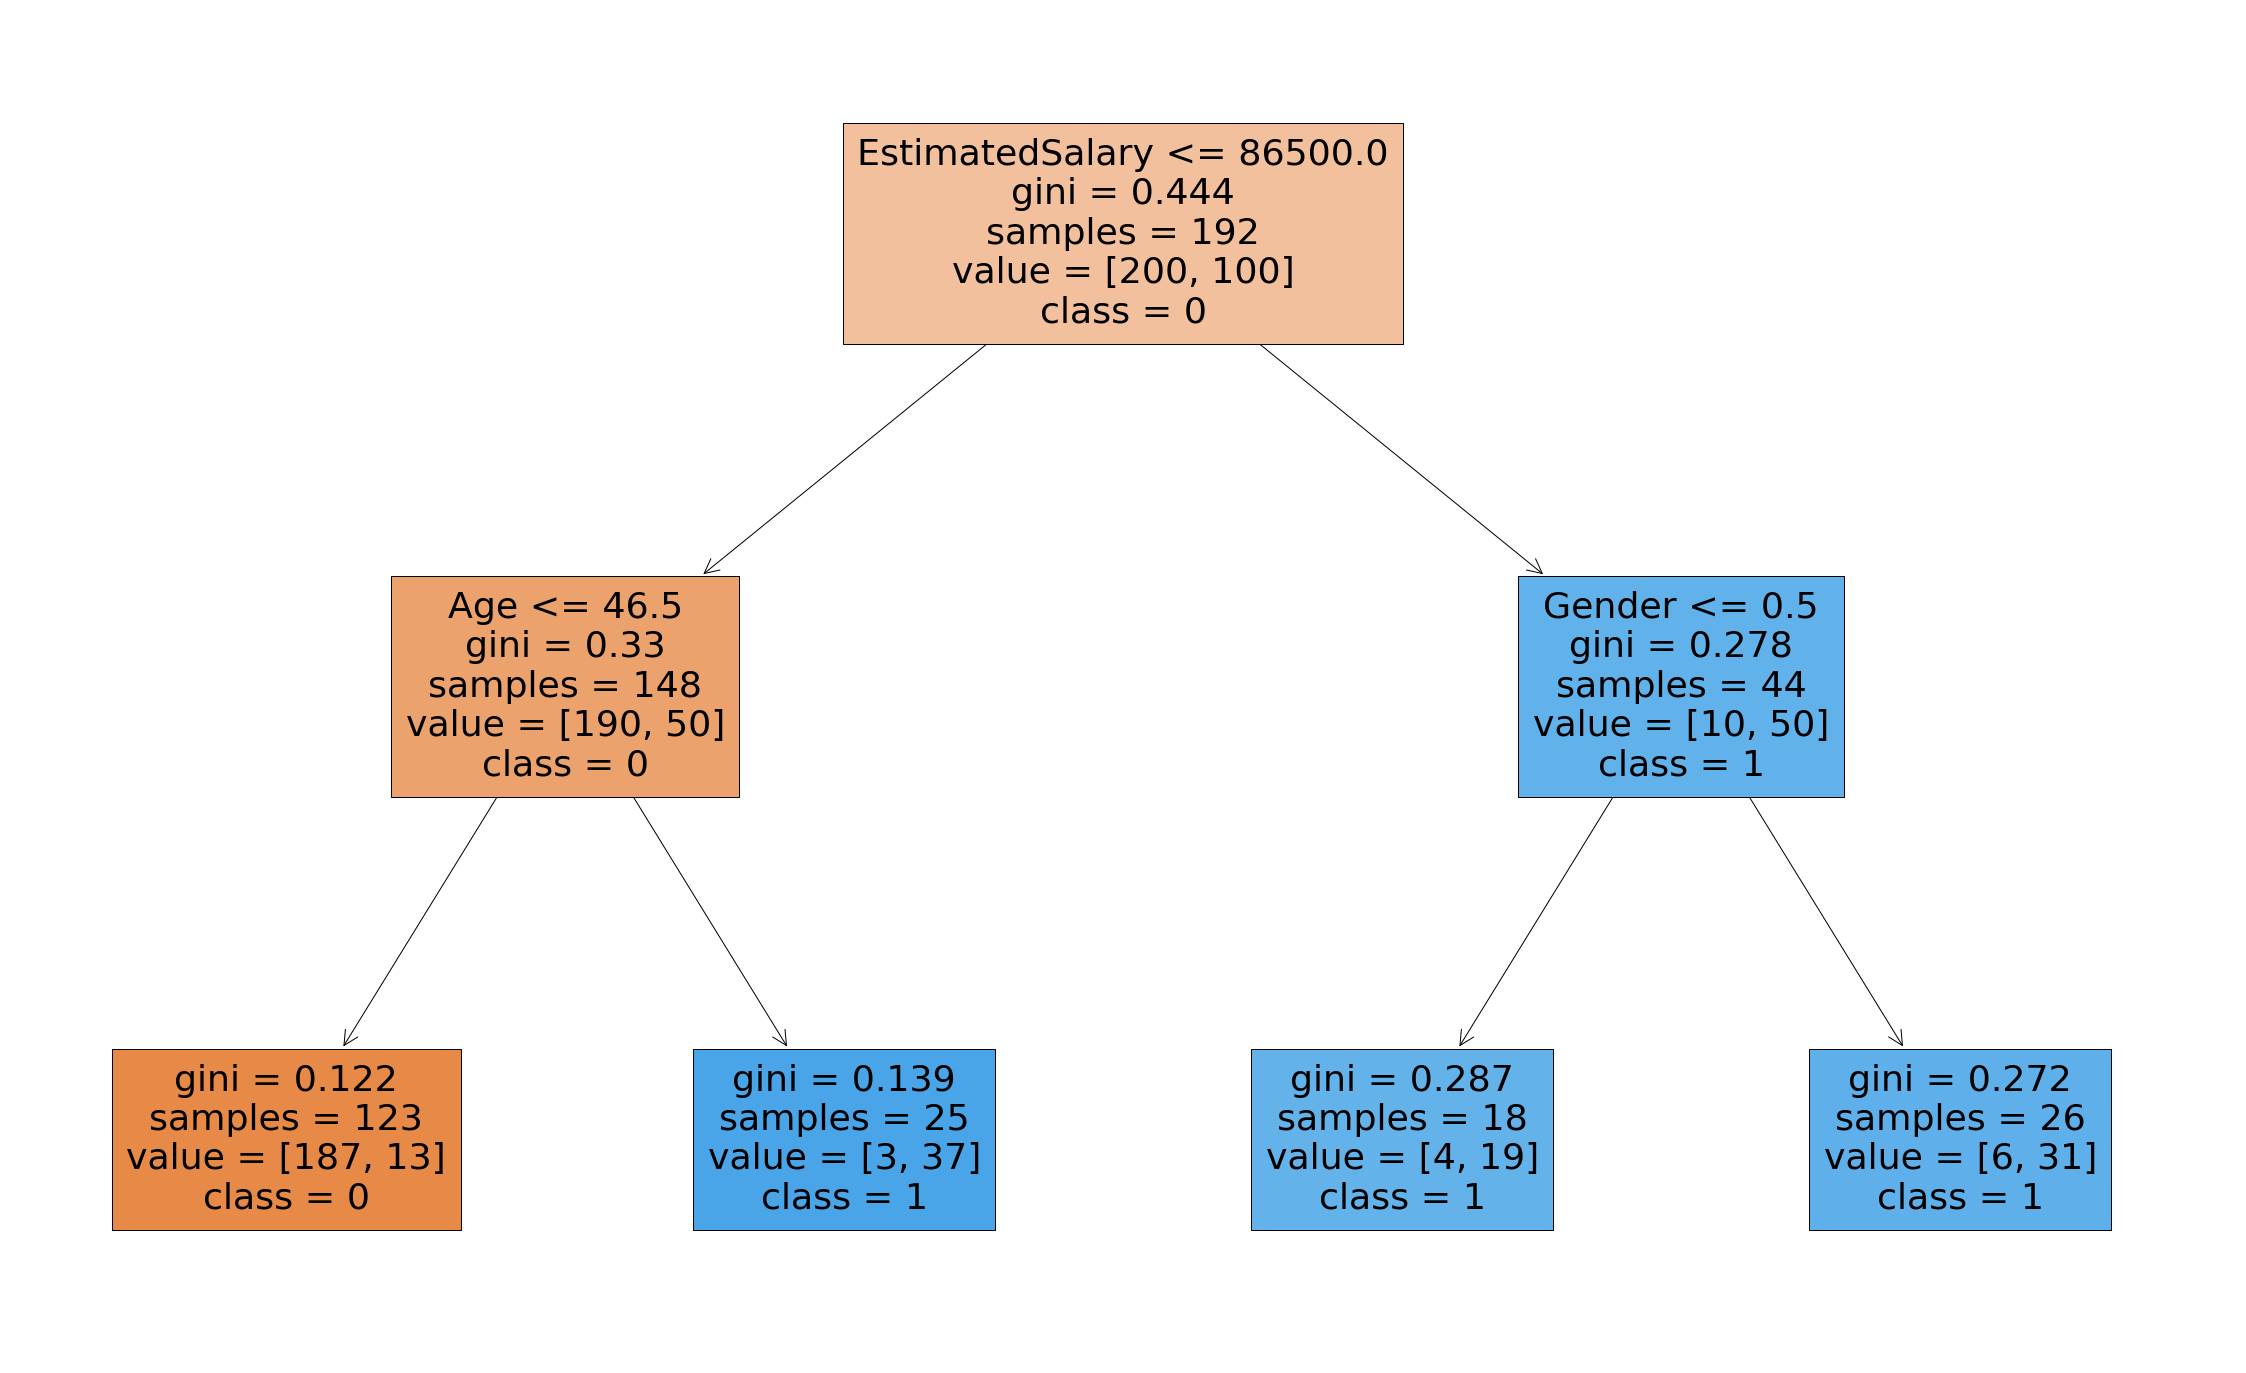

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,25))

tree.plot_tree(rf.estimators_[8],feature_names=x_test.columns,class_names=['0','1'],filled = True)

In [23]:
tree=rf.estimators_[5]

In [26]:
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = x_test.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [30]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 2
